In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

In [3]:
from sklearn.utils import Bunch  ## Array,Target and Target names and so on.

In [4]:
from skimage.io import imread # to read the image
from skimage.transform import resize
import skimage as sk

In [5]:
def generate_data(Location, dim=(64,64)):
    """We are Generating the data with different Dimensions of the data set and we are bring them into 24*24"""
    
    img_dir = Path(Location)
    print(img_dir)
    folder_dir = [directory for directory in img_dir.iterdir()]
    print(folder_dir)
    categories = [fo.name for fo in folder_dir]
    print(categories)
    
    images = []
    image_data = []
    target = []
    
    desc = "Image Generation"
    
    for i, direc in enumerate(folder_dir):
        # print(i,direc)
        for files in direc.iterdir():
            # print(files)
            img = imread(files)
            img_resize = resize(img,dim)
            images.append(img_resize)
            image_data.append(img_resize.flatten())
            target.append(i)
            
    # Covering list data into array Format
    flat_data = np.array(image_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data = flat_data,
                target = target,
                target_names = categories,
                images = images,
                desc = desc)
            
 

In [6]:
Dataset = generate_data("Fruits")
Dataset

Fruits
[WindowsPath('Fruits/guava'), WindowsPath('Fruits/lemon')]
['guava', 'lemon']


{'data': array([[0.23188955, 0.2817402 , 0.08235294, ..., 0.23590686, 0.24375   ,
         0.10196078],
        [0.45882353, 0.5451057 , 0.34522825, ..., 0.43553922, 0.51776961,
         0.26275276],
        [0.12573529, 0.11764706, 0.04338235, ..., 0.56470588, 0.66666667,
         0.26642157],
        ...,
        [0.48210736, 0.62745098, 0.27058824, ..., 0.24540441, 0.40618873,
         0.1526956 ],
        [0.48156403, 0.64227941, 0.23946078, ..., 0.24723499, 0.3335095 ,
         0.08235294],
        [0.17254902, 0.24422727, 0.10196078, ..., 0.484375  , 0.57348106,
         0.3254902 ]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1

In [7]:
Dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'desc'])

In [8]:
Dataset.data.shape

(120, 12288)

In [9]:
Dataset.target.shape

(120,)

In [10]:
Dataset.target_names

['guava', 'lemon']

In [11]:
x = Dataset.data

In [12]:
x

array([[0.23188955, 0.2817402 , 0.08235294, ..., 0.23590686, 0.24375   ,
        0.10196078],
       [0.45882353, 0.5451057 , 0.34522825, ..., 0.43553922, 0.51776961,
        0.26275276],
       [0.12573529, 0.11764706, 0.04338235, ..., 0.56470588, 0.66666667,
        0.26642157],
       ...,
       [0.48210736, 0.62745098, 0.27058824, ..., 0.24540441, 0.40618873,
        0.1526956 ],
       [0.48156403, 0.64227941, 0.23946078, ..., 0.24723499, 0.3335095 ,
        0.08235294],
       [0.17254902, 0.24422727, 0.10196078, ..., 0.484375  , 0.57348106,
        0.3254902 ]])

In [13]:
y = Dataset.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
x.shape

(120, 12288)

In [15]:
y.shape

(120,)

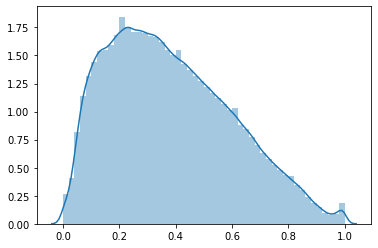

In [16]:
sns.distplot(Dataset.data)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test =train_test_split(x,y)

In [19]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((30, 12288), (90, 12288), (30,), (90,))

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression(max_iter=1000)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
yhat = lr.predict(x_test)

In [24]:
pd.DataFrame({'Actual':y_test,
             'New':yhat,
             'Both are equal':y_test==yhat})

,Actual,New,Both are equal
0,0,0,True
1,1,1,True
2,1,0,False
3,1,1,True
4,1,1,True
5,0,0,True
6,0,0,True
7,0,0,True
8,0,0,True
9,0,0,True


In [25]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [26]:
cm = confusion_matrix(y_test,yhat)

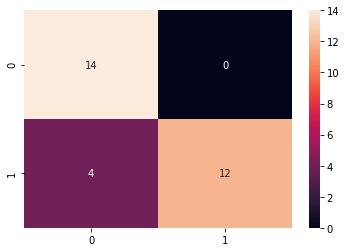

In [27]:
sns.heatmap(cm,annot=True)

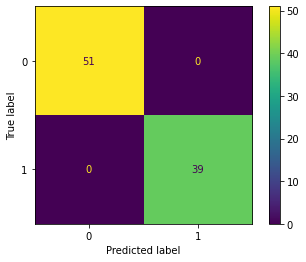

In [28]:
plot_confusion_matrix(lr,x_train,y_train)

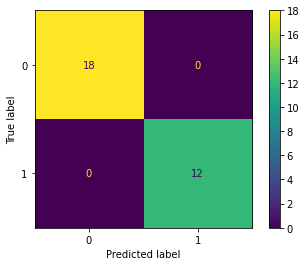

In [29]:
plot_confusion_matrix(lr,x_test,yhat)

In [30]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.75      0.86        16

    accuracy                           0.87        30
   macro avg       0.89      0.88      0.87        30
weighted avg       0.90      0.87      0.87        30



In [31]:
from sklearn.metrics import accuracy_score,precision_score

In [32]:
accuracy_score(y_test,yhat)

0.8666666666666667

# KNN CLASSIFIER

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier()

In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
knn_yhat = knn.predict(x_test)

In [37]:
knn_yhat

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
pd.DataFrame({'Actual':y_test,
             'knn_prediction':knn_yhat,
              'Logistic prediction':yhat,
             'y_test and knn_yhat':(y_test == knn_yhat),
             'y_test and yhat':(y_test==yhat)})

,Actual,knn_prediction,Logistic prediction,y_test and knn_yhat,y_test and yhat
0,0,0,0,True,True
1,1,0,1,False,True
2,1,0,0,False,False
3,1,0,1,False,True
4,1,1,1,True,True
5,0,0,0,True,True
6,0,0,0,True,True
7,0,0,0,True,True
8,0,0,0,True,True
9,0,0,0,True,True


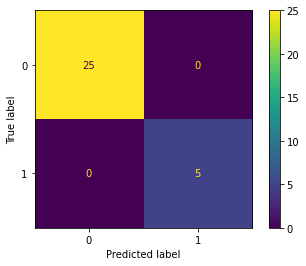

In [39]:
plot_confusion_matrix(knn,x_test,knn_yhat)

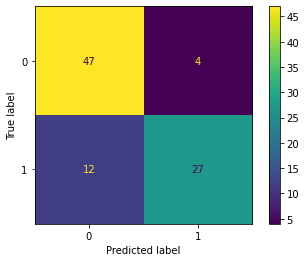

In [40]:
plot_confusion_matrix(knn,x_train,y_train)

In [41]:
cm = confusion_matrix(y_test,knn_yhat)

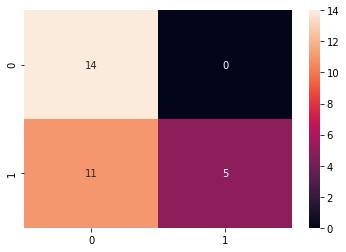

In [42]:
sns.heatmap(cm,annot=True)

In [43]:
print(classification_report(y_test,knn_yhat))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        14
           1       1.00      0.31      0.48        16

    accuracy                           0.63        30
   macro avg       0.78      0.66      0.60        30
weighted avg       0.79      0.63      0.59        30



In [44]:
tp = cm[0,0]
tp

14

In [45]:
tn = cm[1,1]
tn

5

In [46]:
fp = cm[1,0]
fp

11

In [47]:
fn = cm[0,1]
fn

0

In [48]:
acc = (tp/tn)/(tp+tn+fp+fn)
acc

0.09333333333333332

In [49]:
from sklearn.metrics import plot_roc_curve

In [50]:
from sklearn.naive_bayes import MultinomialNB,CategoricalNB,ComplementNB,BernoulliNB,GaussianNB

In [51]:
mnb = MultinomialNB()

In [52]:
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
mnb_yhat = mnb.predict(x_test)

In [54]:
mnb_yhat

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1])

In [55]:
cm1 = confusion_matrix(y_test,mnb_yhat)

In [56]:
cm1

array([[13,  1],
       [ 7,  9]], dtype=int64)

In [57]:
print (classification_report(y_test,mnb_yhat))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76        14
           1       0.90      0.56      0.69        16

    accuracy                           0.73        30
   macro avg       0.78      0.75      0.73        30
weighted avg       0.78      0.73      0.73        30



In [58]:
accuracy_score(y_test,mnb_yhat)

0.7333333333333333

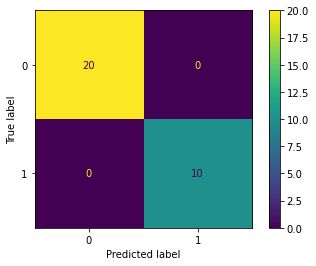

In [59]:
plot_confusion_matrix(mnb,x_test,mnb_yhat)

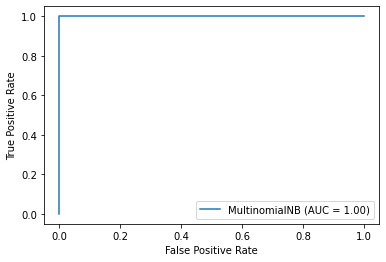

In [60]:
plot_roc_curve(mnb,x_test,mnb_yhat)

In [61]:
cnb = ComplementNB()

In [62]:
cnb.fit(x_train,y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [63]:
cnb_yhat = cnb.predict(x_test)

In [64]:
cnb_yhat

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1])

In [65]:
cm2  = confusion_matrix(y_test,cnb_yhat)
cm2

array([[13,  1],
       [ 7,  9]], dtype=int64)

In [66]:
print(classification_report(y_test,cnb_yhat))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76        14
           1       0.90      0.56      0.69        16

    accuracy                           0.73        30
   macro avg       0.78      0.75      0.73        30
weighted avg       0.78      0.73      0.73        30



In [67]:
accuracy_score(y_test,cnb_yhat)

0.7333333333333333

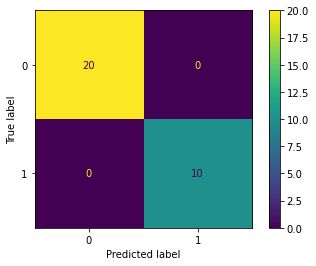

In [68]:
plot_confusion_matrix(cnb,x_test,cnb_yhat)

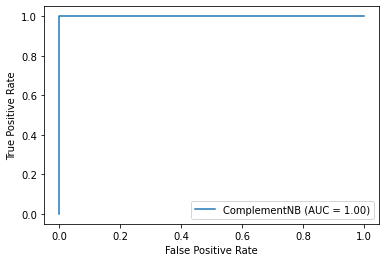

In [69]:
plot_roc_curve(cnb,x_test,cnb_yhat)

In [70]:
ct = CategoricalNB()

In [71]:
ct.fit(x_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
ct_yhat = ct.predict(x_test)
ct_yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
cm3 = confusion_matrix(y_test,ct_yhat)
cm3

array([[14,  0],
       [16,  0]], dtype=int64)

In [74]:
accuracy_score(y_test,ct_yhat)

0.4666666666666667

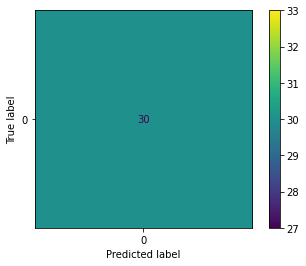

In [75]:
plot_confusion_matrix(ct,x_test,ct_yhat)

c:\users\91833\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


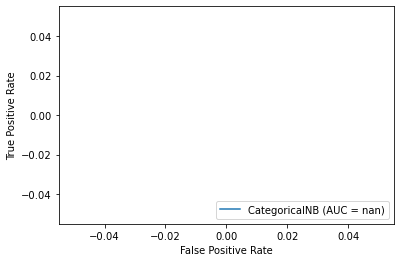

In [76]:
plot_roc_curve(ct,x_test,ct_yhat)

In [77]:
gnb = GaussianNB()

In [78]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
gnb_yhat = gnb.predict(x_test)

In [80]:
gnb_yhat

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1])

In [81]:
cm4 = confusion_matrix(y_test,gnb_yhat)
cm4

array([[11,  3],
       [ 7,  9]], dtype=int64)

In [82]:
accuracy_score(y_test,gnb_yhat)

0.6666666666666666

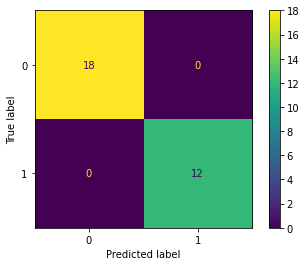

In [83]:
plot_confusion_matrix(gnb,x_test,gnb_yhat)

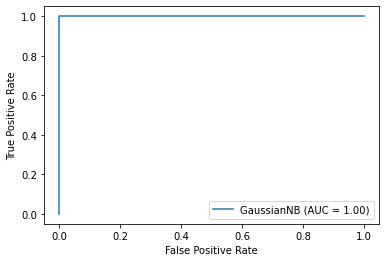

In [84]:
plot_roc_curve(gnb,x_test,gnb_yhat)

In [85]:
bnb = BernoulliNB()

In [86]:
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [87]:
bnb_yhat = gnb.predict(x_test)
bnb_yhat

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1])

In [88]:
cm = confusion_matrix(y_test,gnb_yhat)
cm

array([[11,  3],
       [ 7,  9]], dtype=int64)

In [89]:
accuracy_score(y_test,bnb_yhat)

0.6666666666666666

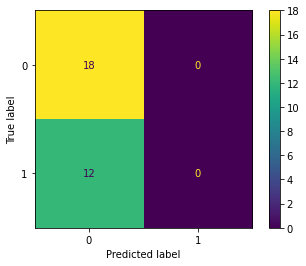

In [90]:
plot_confusion_matrix(bnb,x_test,bnb_yhat)

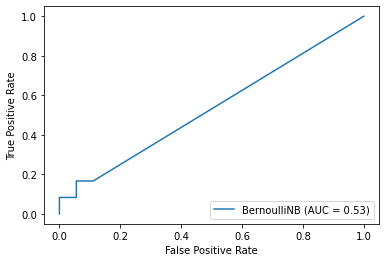

In [91]:
plot_roc_curve(bnb,x_test,bnb_yhat)

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
pd.DataFrame({"BernoulliNB":accuracy_score(y_test,yhat),
              "MultinomialNB":accuracy_score(y_test,mnb_yhat),
              "CategoricalNB":accuracy_score(y_test,ct_yhat),
              "ComplementNB":accuracy_score(y_test,cnb_yhat),
              "GaussianNB":accuracy_score(y_test,gnb_yhat)},index=["Accuracy_score"])

,BernoulliNB,MultinomialNB,CategoricalNB,ComplementNB,GaussianNB
Accuracy_score,0.866667,0.733333,0.466667,0.733333,0.666667


In [94]:
from sklearn.model_selection import cross_val_score
models = [gnb,knn,lr,cnb,mnb,bnb]
for i in models:
    cv = cross_val_score(i,x_train,y_train,cv=2)
    print("Model name",i)
    print("Model score",i.score(x_test,yhat))
    print("*"*30)

Model name GaussianNB(priors=None, var_smoothing=1e-09)
Model score 0.6
******************************
Model name KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Model score 0.7666666666666667
******************************
Model name LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Model score 1.0
******************************
Model name ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)
Model score 0.8
******************************
Model name MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Model score 0.8
******************************
Model n

# SVM

In [95]:

from sklearn.svm import SVC

In [96]:
model = SVC()

In [97]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((90, 12288), (30, 12288), (90,), (30,))

In [99]:
svm_pred = model.predict(x_test)

In [100]:
svm_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1])

In [101]:
comp = pd.DataFrame({"Actual_data":y_test,
                    "prediction":svm_pred,
                    "Both_are_equal":y_test==svm_pred})

In [102]:
comp

,Actual_data,prediction,Both_are_equal
0,0,0,True
1,1,1,True
2,1,0,False
3,1,0,False
4,1,1,True
5,0,0,True
6,0,0,True
7,0,0,True
8,0,0,True
9,0,0,True


In [103]:
train_score = model.score(x_train,y_train)*100
test_score = model.score(x_test,y_test)*100

In [104]:
print("training_score is {}".format(train_score))
print("test_score is {}".format(test_score))

training_score is 98.88888888888889
test_score is 83.33333333333334


# Model Evaluation

In [105]:
from sklearn.metrics import confusion_matrix,consensus_score,classification_report

In [106]:
kernel = ["linear","poly","rbf","sigmoid"]

Right now my kernel is:- linear
---------------------------------------------------------------------------
My train score for this kernel is 1.0 
Test score for this kernel is 0.8 
Kernel score
   Actual data  prediction
0            0           0
1            1           1
2            1           0
3            1           1
4            1           1 

classification report
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.86      0.75      0.80        16

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

confusion matrix


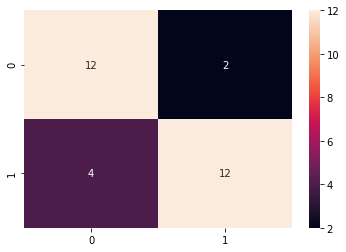

Right now my kernel is:- poly
---------------------------------------------------------------------------
My train score for this kernel is 1.0 
Test score for this kernel is 0.9 
Kernel score
   Actual data  prediction
0            0           0
1            1           1
2            1           0
3            1           1
4            1           1 

classification report
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.81      0.90        16

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30

confusion matrix


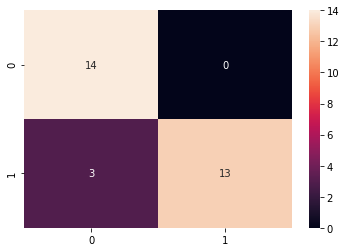

Right now my kernel is:- rbf
---------------------------------------------------------------------------
My train score for this kernel is 0.9888888888888889 
Test score for this kernel is 0.8333333333333334 
Kernel score
   Actual data  prediction
0            0           0
1            1           1
2            1           0
3            1           0
4            1           1 

classification report
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.92      0.75      0.83        16

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30

confusion matrix


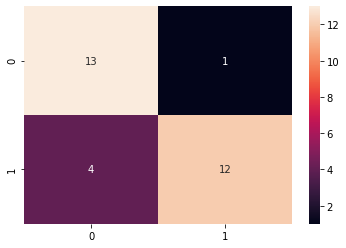

Right now my kernel is:- sigmoid
---------------------------------------------------------------------------
My train score for this kernel is 0.5666666666666667 
Test score for this kernel is 0.4666666666666667 
Kernel score
   Actual data  prediction
0            0           0
1            1           0
2            1           0
3            1           0
4            1           0 

classification report
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        14
           1       0.00      0.00      0.00        16

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30

confusion matrix


c:\users\91833\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


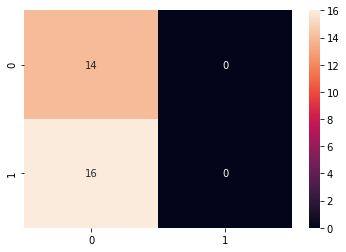

In [107]:
for i in kernel:
    print('\033[1m' + "Right now my kernel is:- {}".format(i))
    print("---"*25)
 
    model_svc = SVC(kernel=i)
    model_svc.fit(x_train,y_train)
    t_score = model_svc.score(x_train,y_train)
    ts_score = model_svc.score(x_test,y_test)
    print("My train score for this kernel is {} \nTest score for this kernel is {} \nKernel score".format(t_score,ts_score))
    pred = model_svc.predict(x_test)
    comp = pd.DataFrame({'Actual data':y_test,
                      'prediction':pred})
    print(comp.head(),'\n')
    print("classification report")
    print(classification_report(y_test,pred))
    print("confusion matrix")
    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm,annot=True)
    plt.show()


# Decision Tree 

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
DTC = DecisionTreeClassifier()

In [110]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [111]:
DTC_yhat = DTC.predict(x_test)

In [112]:
DTC_yhat

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1])

In [113]:
importance = DTC.feature_importances_

In [119]:
importance_features = []
for i,v in enumerate(importance):
   # print('Feature: %0d, Score: %.5f' % (i,v))
    if v > 0:
        importance_features.append(i)
        a=print("feature: %0d,score:%.5f" % (i,v))
        print()
# plot feature importance
# plt.bar([x for x in range(len(importance))],importance)
# plt.show()

feature: 939,score:0.08597

feature: 2775,score:0.13923

feature: 5507,score:0.18771

feature: 9838,score:0.15083

feature: 10840,score:0.14002

feature: 12264,score:0.29623



In [118]:
print(i)

12287


In [120]:
print(importance_features)

[939, 2775, 5507, 9838, 10840, 12264]


In [121]:
from sklearn import tree

[Text(153.45000000000002, 190.26, 'X[12264] <= 0.287\ngini = 0.491\nsamples = 90\nvalue = [51, 39]'),
 Text(83.7, 135.9, 'X[10840] <= 0.297\ngini = 0.353\nsamples = 35\nvalue = [8, 27]'),
 Text(55.800000000000004, 81.53999999999999, 'X[2775] <= 0.51\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(223.20000000000002, 135.9, 'X[5507] <= 0.37\ngini = 0.341\nsamples = 55\nvalue = [43, 12]'),
 Text(167.4, 81.53999999999999, 'X[939] <= 0.219\ngini = 0.095\nsamples = 40\nvalue = [38, 2]'),
 Text(139.5, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(195.3, 27.180000000000007, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(279.0, 81.53999999999999, 'X[9838] <= 0.343\ngini = 0.444\nsamples = 15\nvalue = [5, 10]

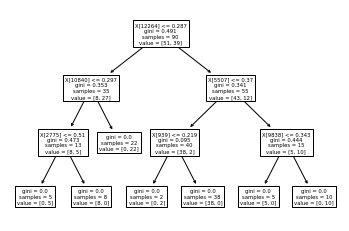

In [122]:
tree.plot_tree(DTC)

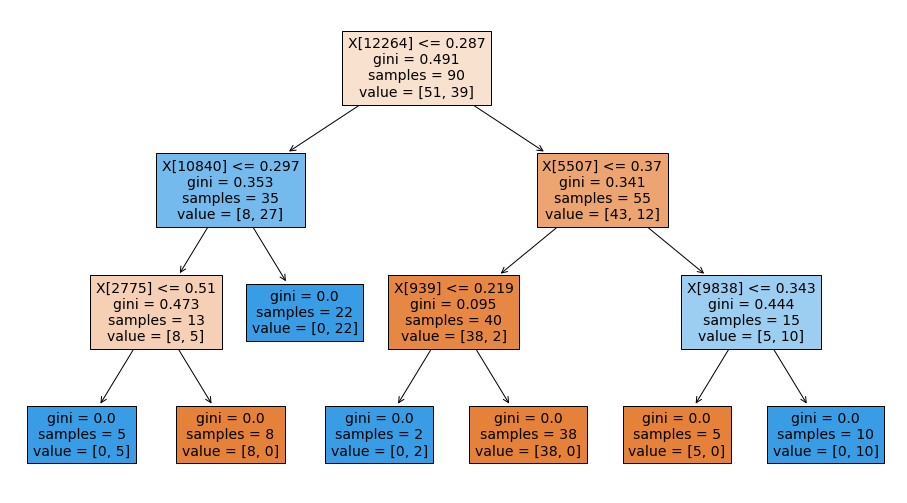

In [123]:
plt.figure(figsize=(16,9))
tree.plot_tree(DTC,filled=True)
plt.show()